# 라이브러리

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import re
import joblib

from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder

from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:
    rc('font', family='AppleGothic')

In [9]:
import warnings
warnings.filterwarnings('ignore')

# Data Importing

In [2]:
train = pd.read_pickle('./data/clustered_apartment.pkl')

# Visualization

## 아파트 동 주소(apartment_addr_town)
- 상위 3개의 동을 봤을 때 고르게 분포하는 것을 확인할 수 있습니다.

In [3]:
def top_list(n):
    for i in range(9):
        top = ' '.join(train.loc[train['cluster']==i,'apartment_addr_town'].value_counts().head(3).index.tolist())
        print(f'{i}번 집단: {top}')
top_list(3)

0번 집단: 신월동 신림동 평창동
1번 집단: 반포동 도곡동 역촌동
2번 집단: 응암동 대조동 천호동
3번 집단: 방배동 성내동 잠원동
4번 집단: 청담동 남현동 역삼동
5번 집단: 독산동 장안동 신월동
6번 집단: 삼성동 논현동 역삼동
7번 집단: 길동 성내동 천호동
8번 집단: 방이동 가락동 오금동


## 지역구(district_name)
- 집단별로 지역구의 구성이 조금씩 차이나는 것으로 보입니다.
- 0번 1번 집단의 경우 특정 지역에서만 분포하는 것을 확인할 수 있습니다.

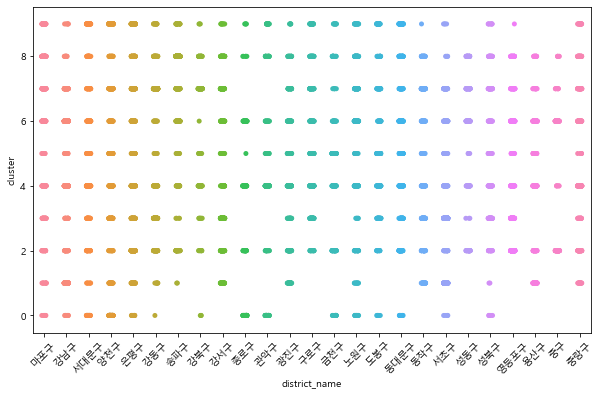

In [4]:
plt.figure(figsize=(10,6))
sns.stripplot(data=train, x='district_name', y='cluster')
plt.xticks(rotation=45)
plt.show()

## 학생 수(school_students)
- 1번,3번 집단의 학생 수가 많은 것을 확인할 수 있습니다.

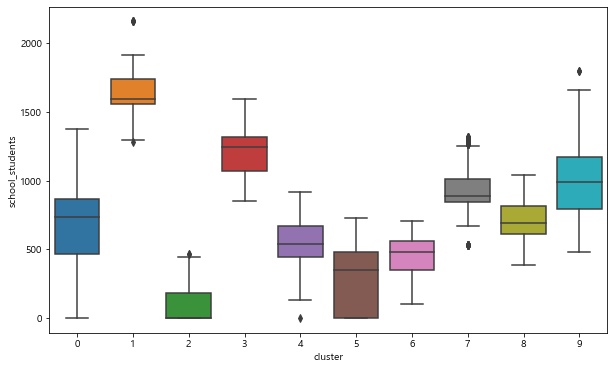

In [5]:
plt.figure(figsize=(10,6))
sns.boxplot(data=train, x='cluster', y='school_students')
plt.show()

In [6]:
population = pd.read_excel("./data/population.xlsx")
population.drop(['※ 매년 말일자 통계 현황','Unnamed: 4'],axis=1,inplace=True)
population.drop([0,1,2],inplace=True)
population.rename(columns={'Unnamed: 1':'district_name','Unnamed: 2':'총인구수','Unnamed: 3':'세대수'},inplace=True)
population['district_name'] = population.district_name.str.split(' ').str[1]
population['세대수'] = population.세대수.str.replace(',', '').astype('int64')

In [7]:
population.head()

,district_name,총인구수,세대수
3,종로구,"151,290",73947
4,중구,"126,171",62739
5,용산구,"228,670",110126
6,성동구,"300,889",135838
7,광진구,"351,350",164428


In [10]:
df1 = pd.merge(train,population,on='district_name',how='left')
df1['ratio'] = 0.0
for ind in df1.index:
  a = float(df1['세대수'][ind])
  b = float(df1['school_students'][ind])
  df1['ratio'][ind] = b/a

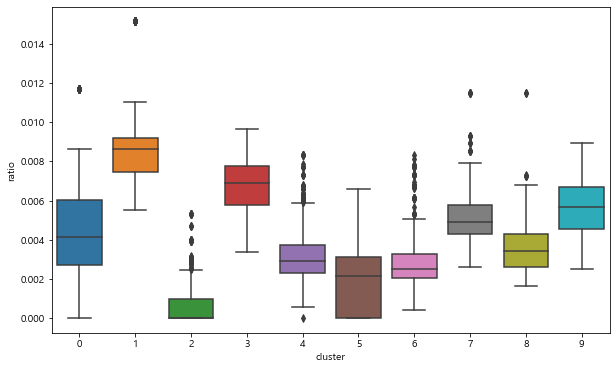

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df1, x='cluster', y='ratio')
plt.show()

- 자치구 세대 인구수 대비 학생수의 비율을 집단별로 살펴보았을 때, 여전히 집단 1과 집단 3의 값이 높은 것을 확인할 수 있습니다

## 지하철 역까지의 평균 거리
- 6, 7번 집단이 지하철역과의 거리가 낮게 나왔으며, 1번 9번 집단이 높은 값을 보입니다

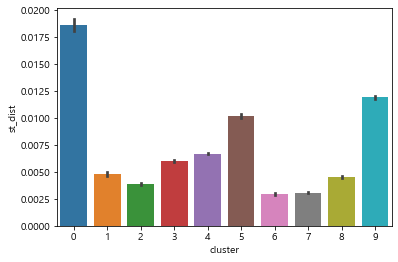

In [13]:
sns.barplot(data=train, x='cluster', y='st_dist', estimator=np.mean)
plt.show()